<a href="https://colab.research.google.com/github/CodeHunterOfficial/A_PythonLibraries/blob/main/NV/%D0%91%D0%B8%D0%B1%D0%BB%D0%B8%D0%BE%D1%82%D0%B5%D0%BA%D0%B0%20CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Библиотека CatBoost для задач классификации
## Введение
CatBoost (Categorical Boosting) — это библиотека для градиентного бустинга, разработанная Яндексом. Она предназначена для работы с категориальными данными и обеспечивает высокую производительность при обработке больших наборов данных. В этой лекции мы подробно рассмотрим, как использовать CatBoost для решения задач классификации и регрессии, включая теоретические основы, функции потерь, метрики оценки, примеры использования и лучшие практики.

## 1. Основные понятия
### 1.1. Градиентный бустинг
Градиентный бустинг — это метод ансамблевого обучения, который строит модель, последовательно обучая слабые модели (обычно деревья решений) и корректируя ошибки предыдущих. Каждое новое дерево обучается на градиенте функции потерь от предсказаний предыдущих деревьев.
Формально, предсказание $F(x)$ для объекта $x$ можно выразить как:

$$
F(x) = F_{m-1}(x) + \nu \cdot h_m(x)
$$

где:
- $F_{m-1}(x)$ — предсказание предыдущей модели,
- $\nu$ — скорость обучения,
- $h_m(x)$ — m-ое дерево решений.

### 1.2. Потери для задач классификации

Для задач классификации используются различные функции потерь в зависимости от типа задачи:

- **Бинарная классификация:** логистическая регрессия. Функция потерь:

$$
L(y, F(x)) = - \left( y \log(\sigma(F(x))) + (1 - y) \log(1 - \sigma(F(x))) \right)
$$

где $\sigma$ — логистическая функция.

- **Мультиклассовая классификация:** кросс-энтропия. Функция потерь:

$$
L(y, F(x)) = - \sum_{c=1}^{C} y_c \log(\sigma(F_c(x)))
$$

где:
- $C$ — количество классов,
- $y_c$ — бинарный индикатор (1 или 0) для класса $c$,
- $\sigma(F_c(x))$ — вероятность того, что объект принадлежит классу $c$.

## 2. Установка и подготовка к работе с CatBoost

Для начала необходимо установить библиотеку. Это можно сделать с помощью pip:

In [ ]:
# установка библиотеки
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


Импортируем необходимые библиотеки:

In [ ]:
# импорт пакетов и дополнительных библиотек
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## 3. Пример 1: Бинарная классификация

### 3.1. Подготовка данных

Рассмотрим набор данных "Titanic", в котором мы будем предсказывать выживание пассажиров.

In [ ]:
# импорт файла с данными
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [ ]:
# Загрузка данных
data = pd.read_csv("Titanic-Dataset.csv")

# Выбор необходимых столбцов
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

# Обработка пропусков
data['Age'].fillna(data['Age'].median(), inplace=True)

# Кодирование категориальных признаков
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Разделение данных на обучающую и тестовую выборки
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data

<ipython-input-4-f1eb8f617e70>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000
887,1,1,1,19.0,0,0,30.0000
888,0,3,1,28.0,1,2,23.4500
889,1,1,0,26.0,0,0,30.0000


### 3.2. Обучение модели

Создаем и обучаем модель CatBoost:

In [ ]:
# обучение модели
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

0:	learn: 0.6236302	total: 49ms	remaining: 49s
100:	learn: 0.2764237	total: 179ms	remaining: 1.59s
200:	learn: 0.1962799	total: 279ms	remaining: 1.11s
300:	learn: 0.1547785	total: 386ms	remaining: 895ms
400:	learn: 0.1290951	total: 488ms	remaining: 729ms
500:	learn: 0.1108922	total: 591ms	remaining: 589ms
600:	learn: 0.0958981	total: 696ms	remaining: 462ms
700:	learn: 0.0858038	total: 800ms	remaining: 341ms
800:	learn: 0.0786892	total: 897ms	remaining: 223ms
900:	learn: 0.0733998	total: 994ms	remaining: 109ms
999:	learn: 0.0696733	total: 1.1s	remaining: 0us


### 3.3. Оценка модели

Теперь оценим качество модели:

In [ ]:
# оценка модели
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### 3.4. Важность признаков

CatBoost позволяет легко визуализировать важность признаков:

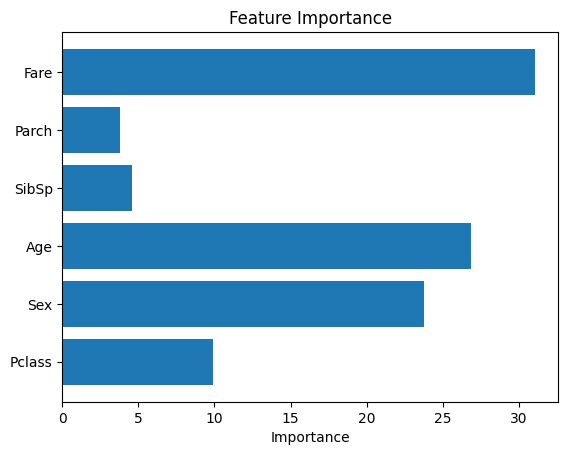

In [ ]:
# важность признаков
feature_importances = model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## 4. Пример 2: Мультиклассовая классификация

Рассмотрим набор данных "Iris", в котором мы будем предсказывать вид цветка.

### 4.1. Подготовка данных





In [ ]:
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4.2. Обучение модели

In [ ]:
model = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

0:	learn: 0.9813365	total: 1.39ms	remaining: 1.39s
100:	learn: 0.0482433	total: 48ms	remaining: 428ms
200:	learn: 0.0208260	total: 93.7ms	remaining: 372ms
300:	learn: 0.0129658	total: 150ms	remaining: 347ms
400:	learn: 0.0092262	total: 204ms	remaining: 305ms
500:	learn: 0.0071433	total: 259ms	remaining: 258ms
600:	learn: 0.0058393	total: 330ms	remaining: 219ms
700:	learn: 0.0049524	total: 377ms	remaining: 161ms
800:	learn: 0.0043034	total: 430ms	remaining: 107ms
900:	learn: 0.0037637	total: 479ms	remaining: 52.7ms
999:	learn: 0.0033542	total: 528ms	remaining: 0us


### 4.3. Оценка модели

In [ ]:
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 4.4. Важность признаков

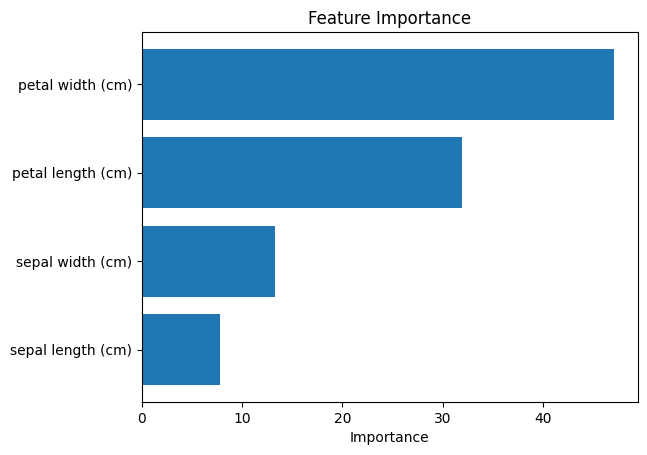

In [ ]:
feature_importances = model.get_feature_importance()
plt.barh(iris.feature_names, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## 5. Метрики для оценки качества классификации

### 5.1. Accuracy

Accuracy (доля правильных предсказаний) определяется как:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

где:
- $TP$ — истинно положительные,
- $TN$ — истинно отрицательные,
- $FP$ — ложно положительные,
- $FN$ — ложно отрицательные.

### 5.2. Precision и Recall

- **Precision (точность)**:

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall (полнота)**:

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

### 5.3. F1-score

F1-score — гармоническое среднее точности и полноты:

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

### 5.4. ROC и AUC

- **ROC (Receiver Operating Characteristic)** — кривая, показывающая соотношение между чувствительностью (Recall) и специфичностью (1 - FPR).
- **AUC (Area Under the Curve)** — площадь под кривой ROC. Чем выше AUC, тем лучше модель.

## 6. Обработка категориальных признаков

CatBoost может обрабатывать категориальные данные без необходимости их предварительного кодирования, что позволяет избежать переобучения и потери информации.

### Пример обработки категориальных признаков

In [ ]:
# Пример данных
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
    'Value': [1, 2, 3, 4, 5, 6, 7, 8],
    'Target': [0, 1, 0, 1, 0, 1, 0, 1]
})

# Определяем категориальные признаки
cat_features = ['Category']

# Разделяем данные
X = data.drop('Target', axis=1)
y = data['Target']

# Создаем и обучаем модель
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, cat_features=cat_features, verbose=10)
model.fit(X, y)

0:	learn: 0.6868698	total: 1.1ms	remaining: 109ms
10:	learn: 0.6289012	total: 2.84ms	remaining: 23ms
20:	learn: 0.5732708	total: 4.49ms	remaining: 16.9ms
30:	learn: 0.5185352	total: 7.54ms	remaining: 16.8ms
40:	learn: 0.4761230	total: 9.58ms	remaining: 13.8ms
50:	learn: 0.4339631	total: 11.8ms	remaining: 11.3ms
60:	learn: 0.3850446	total: 13.8ms	remaining: 8.85ms
70:	learn: 0.3622697	total: 15.9ms	remaining: 6.47ms
80:	learn: 0.3358369	total: 17.9ms	remaining: 4.19ms
90:	learn: 0.3189215	total: 19.9ms	remaining: 1.97ms
99:	learn: 0.3039510	total: 22ms	remaining: 0us


## 7. Настройка гиперпараметров

### Пример настройки гиперпараметров с GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200],
    'depth': [3, 6],
    'learning_rate': [0.1, 0.01],
}

grid_search = GridSearchCV(estimator=CatBoostClassifier(cat_features=cat_features, verbose=0),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3)

grid_search.fit(X, y)
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'depth': 3, 'iterations': 100, 'learning_rate': 0.1}


## 8. Кросс-валидация

### Пример кросс-валидации

In [ ]:
from catboost import Pool, cv, CatBoostClassifier
import pandas as pd

# Создаем Pool для кросс-валидации
pool = Pool(data=X, label=y, cat_features=cat_features)

# Параметры кросс-валидации
params = {
    'iterations': 100,
    'learning_rate': 0.1,
    "verbose": False,
    'depth': 3,
    'eval_metric': 'Accuracy',
    'loss_function': 'Logloss',  # Добавили loss_function
    'random_seed': 42  # Установка случайного сид для воспроизводимости
}

# Выполняем кросс-валидацию
cv_results = cv(pool, params, fold_count=4, shuffle=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/4]

bestTest = 1
bestIteration = 2

Training on fold [1/4]

bestTest = 0
bestIteration = 0

Training on fold [2/4]

bestTest = 1
bestIteration = 6

Training on fold [3/4]

bestTest = 0.5
bestIteration = 1



In [ ]:
from catboost import Pool, cv

cv_data = [["France", 1924, 44],
           ["USA", 1932, 37],
           ["Switzerland", 1928, 25],
           ["Norway", 1952, 30],
           ["Japan", 1972, 35],
           ["Mexico", 1968, 112]]

labels = [1, 1, 0, 0, 0, 1]

cat_features = [0]

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 100,
          "depth": 2,
          "loss_function": "Logloss",
          "verbose": False}

scores = cv(cv_dataset,
            params,
            fold_count=2,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]

bestTest = 0.5738373179
bestIteration = 84

Training on fold [1/2]

bestTest = 0.693188484
bestIteration = 0



# Задание
Для приведенного ниже набора данных создать и обучить модель, оценить ее качество и построить график важности признаков по примерам выше.

In [ ]:
# Создаем вымышленный набор данных
data = pd.DataFrame({
    'CustomerID': range(1, 101),
    'Age': [25, 30, 35, 40, 45] * 20,
    'Gender': ['Male', 'Female'] * 50,
    'Region': ['North', 'South', 'East', 'West'] * 25,
    'Churn': [0, 1, 0, 1, 0] * 20
})

# Кодируем категориальные признаки
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Region'] = data['Region'].astype('category')

# Разделяем данные
X = data.drop(['CustomerID', 'Churn'], axis=1)
y = data['Churn']

Таким образом, мы рассмотрели основные аспекты работы с библиотекой CatBoost для задач классификации. Мы изучили:

- Теоретические основы градиентного бустинга и функции потерь для классификации.
- Как установить и подготовить библиотеку CatBoost.
- Примеры бинарной и мультиклассовой классификации.
- Важность признаков и метрики для оценки качества модели.
- Обработку категориальных признаков, настройку гиперпараметров и кросс-валидацию.

# Библиотека CatBoost для задач регрессии


## 1. Основные понятия

###  Потери для задач регрессии

Для задач регрессии используются различные функции потерь в зависимости от задачи:

- **Среднеквадратичная ошибка (MSE)**. Функция потерь:

$$
L(y, F(x)) = \frac{1}{n} \sum_{i=1}^{n} (y_i - F(x_i))^2
$$

где $y$ — истинные значения, $F(x)$ — предсказанные значения.

- **Средняя абсолютная ошибка (MAE)**. Функция потерь:

$$
L(y, F(x)) = \frac{1}{n} \sum_{i=1}^{n} |y_i - F(x_i)|
$$

## 2. Установка и подготовка к работе с CatBoost

Для начала необходимо установить библиотеку. Это можно сделать с помощью pip:

In [ ]:
!pip install catboost

Импортируем необходимые библиотеки:

In [ ]:
import pandas as pd
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 3. Пример 1: Регрессия

### 3.1. Подготовка данных

Рассмотрим набор данных "California housing", в котором мы будем предсказывать среднюю цену жилья.

In [ ]:
from sklearn.datasets import fetch_california_housing

# Загрузка данных
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.2. Обучение модели

Создаем и обучаем модель CatBoost:

In [ ]:
model = CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=6, verbose=100)
model.fit(X_train, y_train)

0:	learn: 1.0916893	total: 6.3ms	remaining: 6.29s
100:	learn: 0.4856977	total: 976ms	remaining: 8.69s
200:	learn: 0.4317457	total: 2.12s	remaining: 8.43s
300:	learn: 0.4010594	total: 3.23s	remaining: 7.5s
400:	learn: 0.3779586	total: 3.87s	remaining: 5.79s
500:	learn: 0.3608106	total: 4.3s	remaining: 4.29s
600:	learn: 0.3459401	total: 4.75s	remaining: 3.15s
700:	learn: 0.3332879	total: 5.19s	remaining: 2.21s
800:	learn: 0.3220272	total: 5.64s	remaining: 1.4s
900:	learn: 0.3119731	total: 6.08s	remaining: 668ms
999:	learn: 0.3024983	total: 6.53s	remaining: 0us


### 3.3. Оценка модели

Теперь оценим качество модели:

In [ ]:
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 0.19
Mean Absolute Error: 0.29


### 3.4. Важность признаков

CatBoost позволяет легко визуализировать важность признаков:

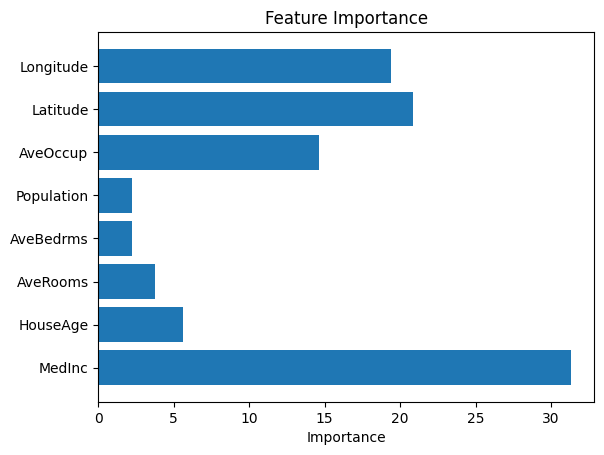

In [ ]:
import matplotlib.pyplot as plt

feature_importances = model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

## 4. Метрики для оценки качества регрессии

### 4.1. Среднеквадратичная ошибка (MSE)

Среднеквадратичная ошибка (MSE) определяется как:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

где:
- $y_i$ — истинные значения,
- $\hat{y}_i$ — предсказанные значения.

### 4.2. Средняя абсолютная ошибка (MAE)

Средняя абсолютная ошибка (MAE) определяется как:

$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

## 5. Обработка категориальных признаков

CatBoost может обрабатывать категориальные данные без необходимости их предварительного кодирования, что позволяет избежать переобучения и потери информации.

### Пример обработки категориальных признаков

In [ ]:
# Пример данных
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
    'Value': [1, 2, 3, 4, 5, 6, 7, 8],
    'Target': [0.5, 1.0, 0.6, 1.5, 0.9, 1.2, 0.7, 1.0]
})

# Определяем категориальные признаки
cat_features = ['Category']

# Разделяем данные
X = data.drop('Target', axis=1)
y = data['Target']

# Создаем и обучаем модель
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, cat_features=cat_features, verbose=10)
model.fit(X, y)

0:	learn: 0.3001805	total: 400us	remaining: 39.6ms
10:	learn: 0.2368799	total: 2.88ms	remaining: 23.3ms
20:	learn: 0.1876214	total: 5.17ms	remaining: 19.5ms
30:	learn: 0.1525792	total: 7.31ms	remaining: 16.3ms
40:	learn: 0.1244594	total: 9.92ms	remaining: 14.3ms
50:	learn: 0.1052008	total: 12.4ms	remaining: 11.9ms
60:	learn: 0.0875695	total: 14.6ms	remaining: 9.35ms
70:	learn: 0.0718613	total: 17.1ms	remaining: 6.97ms
80:	learn: 0.0603290	total: 19.4ms	remaining: 4.55ms
90:	learn: 0.0539713	total: 21.5ms	remaining: 2.13ms
99:	learn: 0.0470806	total: 24.3ms	remaining: 0us


## 6. Настройка гиперпараметров

### Пример настройки гиперпараметров с GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'iterations': [100, 200],
    'depth': [3, 6],
    'learning_rate': [0.1, 0.01],
}

grid_search = GridSearchCV(estimator=CatBoostRegressor(cat_features=cat_features, verbose=0),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3)

grid_search.fit(X, y)
print("Лучшие параметры:", grid_search.best_params_)

Лучшие параметры: {'depth': 3, 'iterations': 100, 'learning_rate': 0.01}


## 7. Кросс-валидация

### Пример кросс-валидации

In [ ]:
from catboost import cv, Pool

# Создаем Pool для кросс-валидации
pool = Pool(X, y, cat_features=cat_features)

# Параметры кросс-валидации
params = {
    'iterations': 100,
    'learning_rate': 0.1,
    'depth': 3,
    'loss_function': 'RMSE',
    "verbose": False,
    'eval_metric': 'RMSE'
}

# Выполняем кросс-валидацию
cv_results = cv(pool, params, fold_count=5, shuffle=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.04455805534
bestIteration = 15

Training on fold [1/5]

bestTest = 0.2439529856
bestIteration = 71

Training on fold [2/5]

bestTest = 0.6178936868
bestIteration = 55

Training on fold [3/5]

bestTest = 0.0546506211
bestIteration = 40

Training on fold [4/5]

bestTest = 0.00723302175
bestIteration = 26



##Обработка категориальных признаков
Для приведенного ниже набора данных обучить модель, оценить ее качество и визуалилировать важность признаков, как в предыдущем примере.

In [ ]:
import numpy as np

# Создаем набор данных
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'A', 'C'],
    'Value': np.random.rand(10) * 10,
    'Target': np.random.rand(10) * 100
})

# Проверяем данные
print(data)

  Category     Value     Target
0        A  4.601971  58.629168
1        B  1.153819  42.516467
2        A  8.814167  30.443348
3        C  9.415321  94.975966
4        B  1.096842  52.537055
5        C  7.444732  52.191193
6        A  4.374002  69.902838
7        B  3.666431  22.682669
8        A  9.690954  21.668266
9        C  7.079386  66.875970


In [ ]:
# Определяем категориальные признаки
cat_features = ['Category']

# Разделяем данные
X = data.drop('Target', axis=1)
y = data['Target']

# Разделяем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Обучение модели

Обучаем модель, указывая, какие признаки являются категориальными.

In [ ]:
# Создаем и обучаем модель
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=3, cat_features=cat_features, verbose=10)
model.fit(X_train, y_train)

0:	learn: 21.0813547	total: 523us	remaining: 51.8ms
10:	learn: 18.2471436	total: 3.38ms	remaining: 27.3ms
20:	learn: 15.9757834	total: 5.66ms	remaining: 21.3ms
30:	learn: 13.5624952	total: 7.93ms	remaining: 17.6ms
40:	learn: 11.3357199	total: 10.2ms	remaining: 14.7ms
50:	learn: 9.2259131	total: 13ms	remaining: 12.5ms
60:	learn: 7.8137436	total: 15.3ms	remaining: 9.77ms
70:	learn: 6.5139944	total: 18ms	remaining: 7.34ms
80:	learn: 5.6958869	total: 20.4ms	remaining: 4.78ms
90:	learn: 4.9472339	total: 22.7ms	remaining: 2.24ms
99:	learn: 4.2008280	total: 25.4ms	remaining: 0us


### Оценка модели

Оцениваем качество модели, как и в предыдущем примере.

In [ ]:
# Предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae:.2f}')

Mean Squared Error: 1337.24
Mean Absolute Error: 31.94


### Важность признаков

Визуализируем важность признаков для модели с категориальными данными.

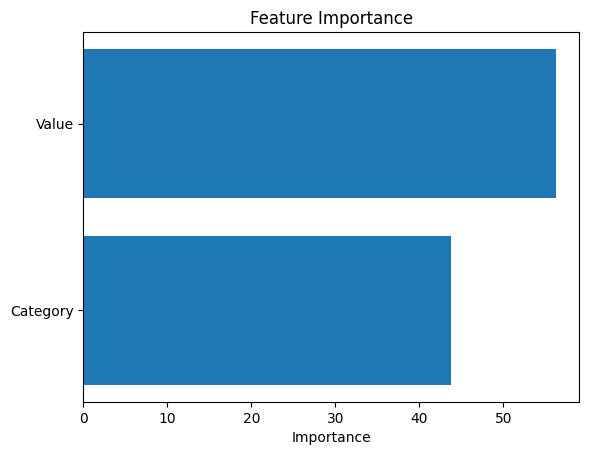

In [ ]:
# Получаем важность признаков
feature_importances = model.get_feature_importance()
plt.barh(X.columns, feature_importances)
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

Таким образом, мы рассмотрели основные аспекты работы с библиотекой CatBoost для задач регрессии. Мы изучили:

- Теоретические основы градиентного бустинга и функции потерь для регрессии.
- Как установить и подготовить библиотеку CatBoost.
- Примеры регрессии на наборе данных California housing.
- Важность признаков и метрики для оценки качества модели.
- Обработку категориальных признаков, настройку гиперпараметров и кросс-валидацию.
